In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')
import pandas as pd
import tensorflow as tf
from tqdm import tqdm


import gym
import numpy as np
import random
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Enable this code to disable the GPU execution

physical_devices = tf.config.list_physical_devices('GPU')
try:
  # Disable all GPUS
  tf.config.set_visible_devices([], 'GPU')
  visible_devices = tf.config.get_visible_devices()
  for device in visible_devices:
    assert device.device_type != 'GPU'
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

tf.compat.v1.disable_eager_execution()

In [4]:
def plot(file, title, exp):
    
    df = pd.read_csv(file)
    fig, ax1 = plt.subplots(figsize=(6,5))

    ax1.set_xlabel('Episodes')
    ax1.set_ylabel('Reward')
    ax1.plot(df.iloc[:,0], df["Reward"], color='grey', label="Reward")
    plt.legend(loc='upper left',frameon=False)
    ax1.plot(df.iloc[:,0], df["Mean_Reward"], color='black', label="100 SMA")
    ax1.tick_params(axis='y')
    plt.axhline(y=200, color='g', linestyle='--')
    plt.ylim((-400,400))
    plt.xlim((0,2000))
    plt.legend(loc='upper left',frameon=False)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    
    ax2.set_ylabel('Epsilon')  # we already handled the x-label with ax1
    ax2.plot(df.iloc[:,0], df["Epsilon"], color='red', label="Epsilon")
    ax2.tick_params(axis='y')
    plt.ylim((0,1.2))

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title("Exp. "+str(exp)+" - Episodes: "+str(df.shape[0])+"\n"+title)
    plt.legend(loc='upper right',frameon=False)

    #plt.show()
    

In [5]:
files = [
        "0p01_0p0001.csv",
        "0p01_0p001.csv",
        "0p01_0p01.csv",
        "0p1_0p0001.csv",
        "0p1_0p001.csv",
        "0p1_0p01.csv",
         "1p0_0p0005.csv",
        "1p0_0p0001.csv",
        "1p0_0p001.csv",
        "1p0_0p01.csv",
        "ep001_0p001_0p0005.csv",
        "ep095_0p001_0p0005.csv",
        "ep_0995_0p001_0p0005.csv",
        "ep100_0p001_0p0005.csv",
        "g95_ep0p995_0p001_0p0001.csv",
        "g95_ep0p995_0p001_0p0005.csv",
        "g98_ep0p995_0p001_0p0001.csv",
        "g98_ep0p995_0p001_0p0005.csv",
    "ANN16.csv",
    "ANN18.csv",
]
len(files)

18

In [6]:
models = ["0p01_0p0001.h5",
        "0p01_0p001.h5",
        "0p01_0p01.h5",
        "0p1_0p0001.h5",
        "0p1_0p001.h5",
        "0p1_0p01.h5",
        "1p0_0p0005.h5",
        "1p0_0p0001.h5",
        "1p0_0p001.h5",
        "1p0_0p01.h5",
        "ep0p01_0p001_0p0005.h5",
        "ep095_0p001_0p0005.h5",
        "ep_0995_0p001_0p0005.h5",
        "ep100_0p001_0p0005.h5",
        "g95_ep0p995_0p001_0p0001.h5",
          "g95_ep0p995_0p001_0p0005.h5",
        "g98_ep0p995_0p001_0p0001.h5",
         "g98_ep0p995_0p001_0p0005.h5",
         "ANN16.h5",
    "ANN18.h5",]
len(models)

18

In [7]:
title = [
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 0.010; \u03B1 = 0.0001",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 0.010; \u03B1 = 0.001",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 0.010; \u03B1 = 0.01",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 0.100; \u03B1 = 0.0001",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 0.100; \u03B1 = 0.001",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 0.100; \u03B1 = 0.01",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 1.000; \u03B1 = 0.0005",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 1.000; \u03B1 = 0.0001",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 1.000; \u03B1 = 0.001",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 1.000; \u03B1 = 0.01",
        "\u03B5 = 0.010; \u03B3 = 0.99; \u03C4 = 0.001; \u03B1 = 0.0005",
        "\u03B5 = 0.950; \u03B3 = 0.99; \u03C4 = 0.001; \u03B1 = 0.0005",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 0.001; \u03B1 = 0.0005",
        "\u03B5 = 1.000; \u03B3 = 0.99; \u03C4 = 0.001; \u03B1 = 0.0005",
        "\u03B5 = 0.995; \u03B3 = 0.95; \u03C4 = 0.001; \u03B1 = 0.0001",
        "\u03B5 = 0.995; \u03B3 = 0.95; \u03C4 = 0.001; \u03B1 = 0.0005",
        "\u03B5 = 0.995; \u03B3 = 0.98; \u03C4 = 0.001; \u03B1 = 0.0001",
        "\u03B5 = 0.995; \u03B3 = 0.98; \u03C4 = 0.001; \u03B1 = 0.0005",]
len(title)

18

In [8]:
len(files) is len(title) is len(models)

True

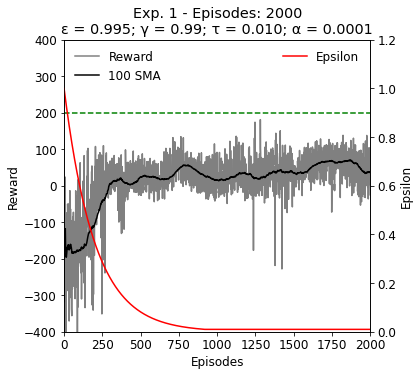

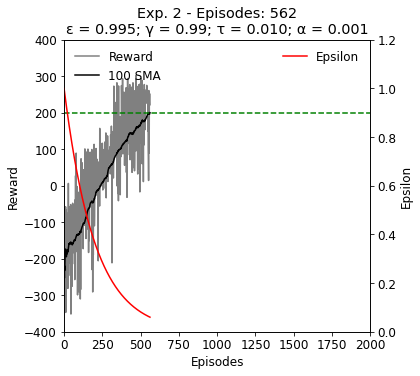

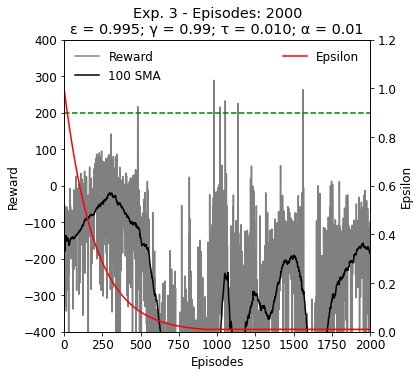

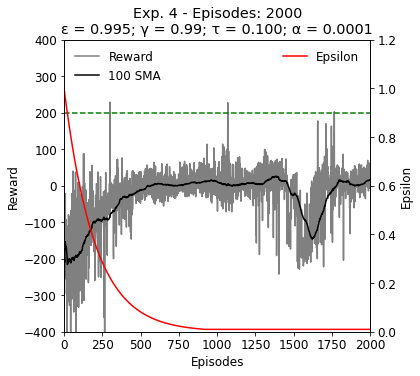

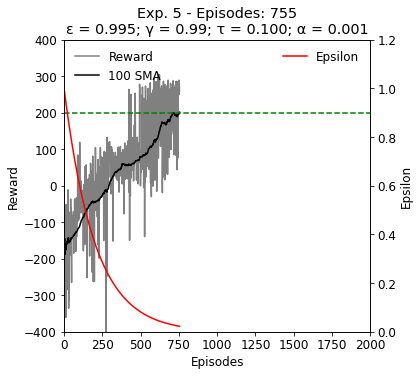

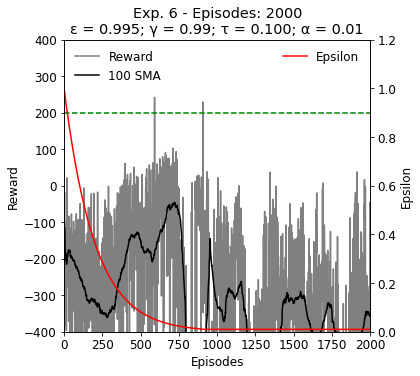

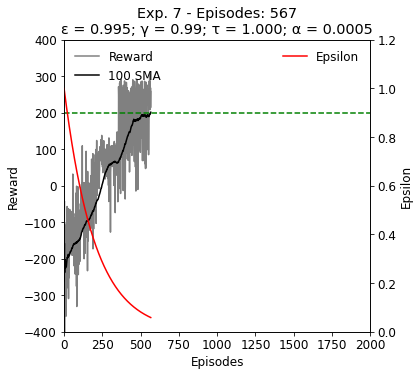

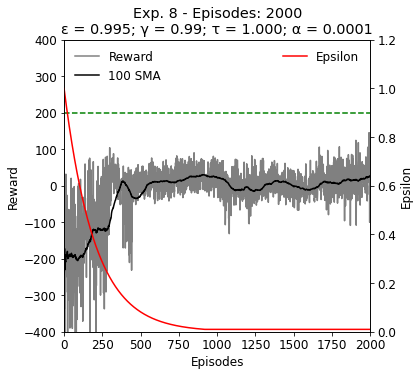

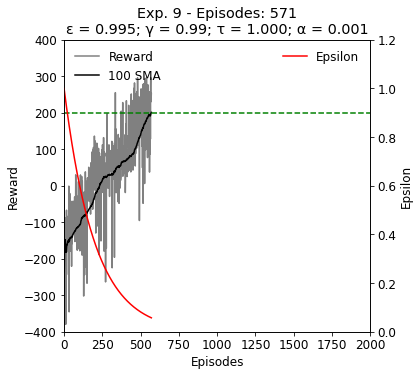

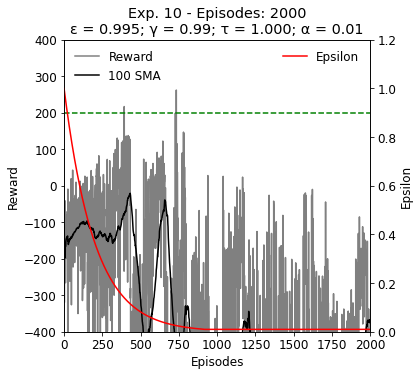

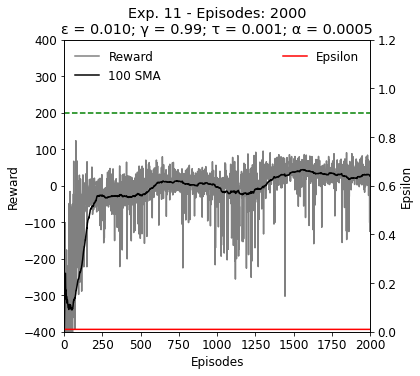

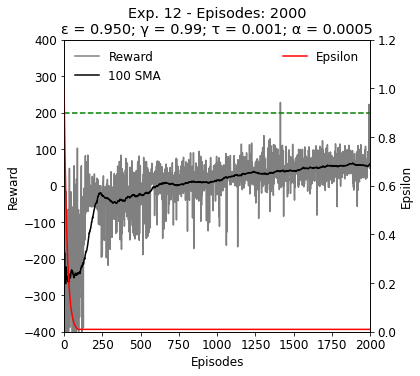

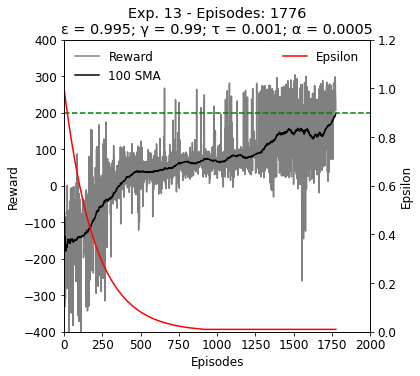

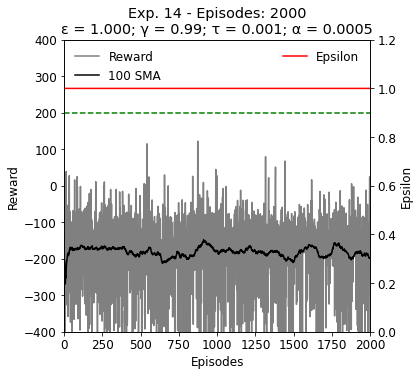

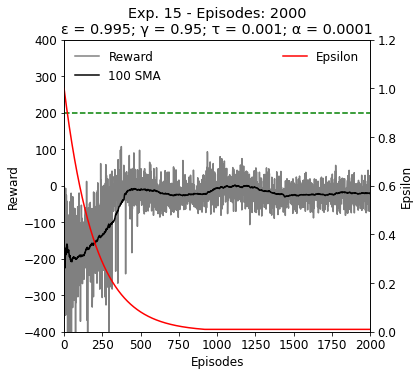

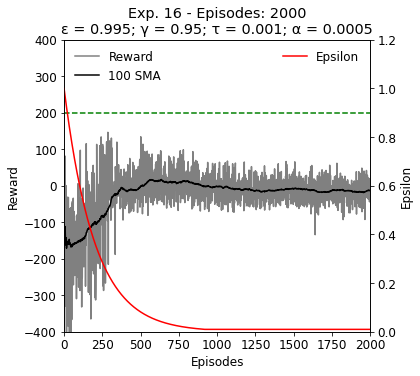

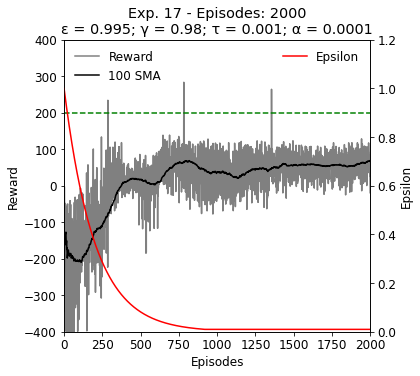

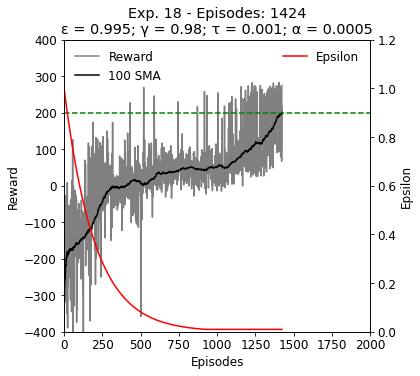

In [9]:
e = 0
for case in range(len(files)):
    e+=1
    plot(files[case], title[case], exp = e)

In [10]:
def test(saved_model):    
    
    model = tf.keras.models.load_model(saved_model)
    
    wins = 0
    env = gym.make("LunarLander-v2")
    scores = []
    
    # run the trained agent 100 trials
    for trial in range(500):
        score = 0
        cur_state = env.reset().reshape(1,8)
        for step in range(1000):
            #env.render()
            action = np.argmax(model.predict(cur_state)[0])
            new_state, reward, done, _ = env.step(action)
            new_state = new_state.reshape(1,8)
            score += reward
            cur_state = new_state
            if done:
                break
        
        if score>=200:
            wins=wins+1
        scores.append(score)
                      
    env.close()
    
    return scores, wins/500.0

In [13]:
def plot_values(saved_model,title_in,xlabel,ylabel, exp):
    values, win_rate = test(saved_model)
    fig = plt.figure()
    plt.plot(np.arange(len(values)), values, label="Reward", color='grey')
    plt.axhline(y=np.mean(values), color='blue', linestyle='-')
    plt.axhline(y=200, color='g', linestyle='--')
    plt.ylim((-400,400))
    plt.xlim((0,500))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='upper right',frameon=False)
    text_ = " Win Rate: "+str(np.round_(win_rate*100, decimals = 3))+"%"
    #plt.text(7,250,text_ )
    
    plt.title("Exp. "+str(exp)+text_+"\n"+title_in)
    plt.show()

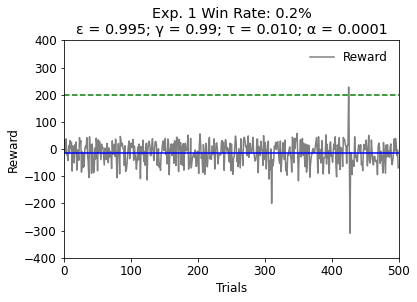

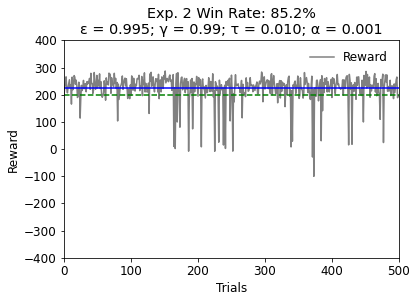

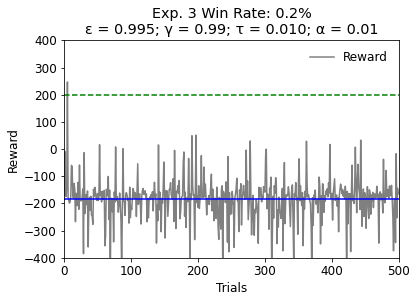

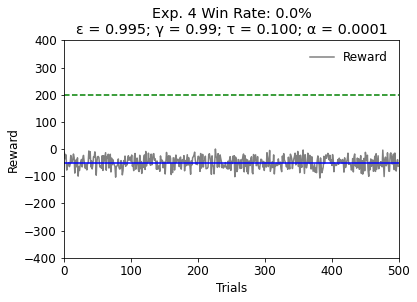

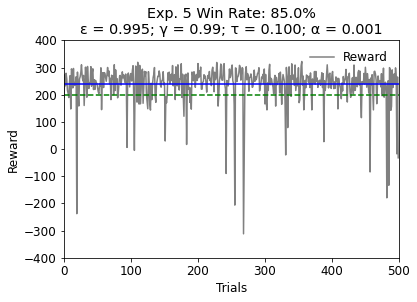

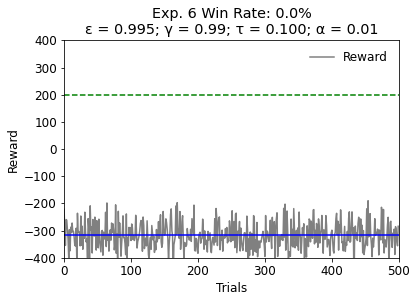

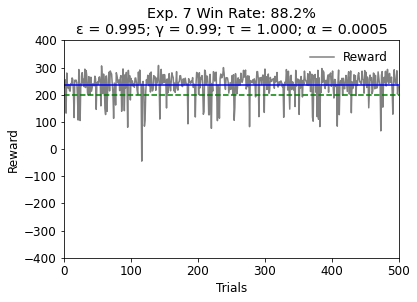

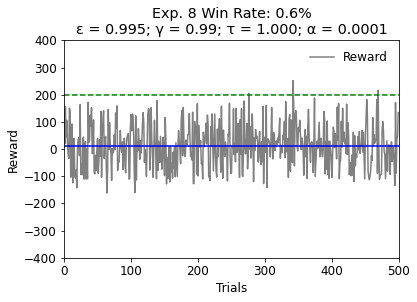

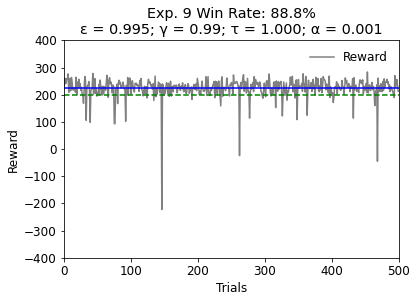

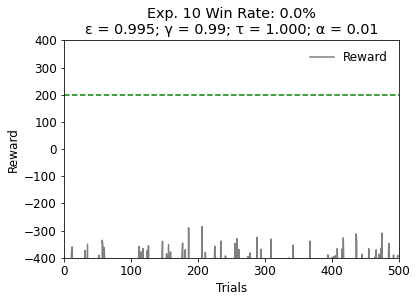

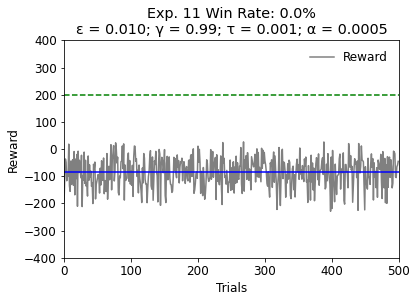

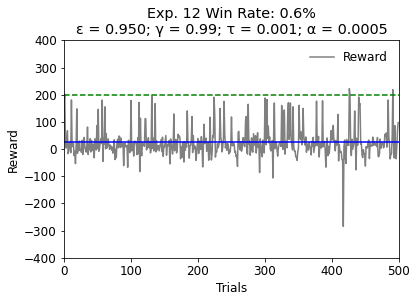

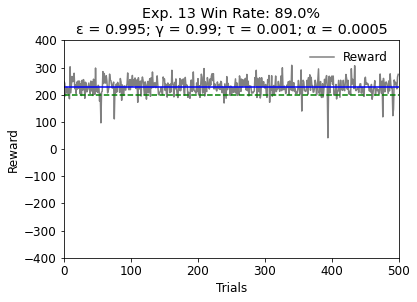

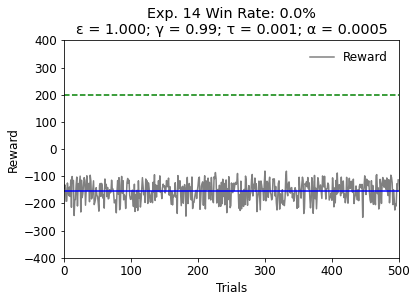

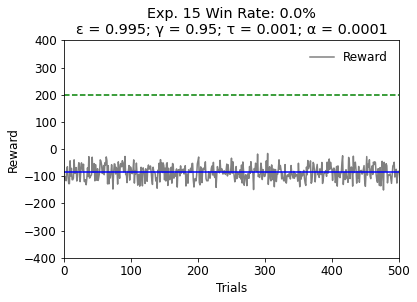

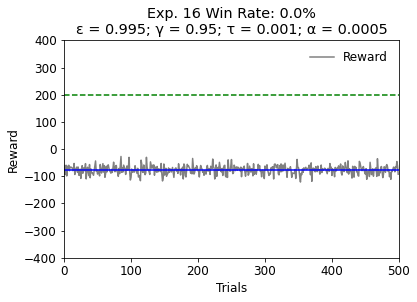

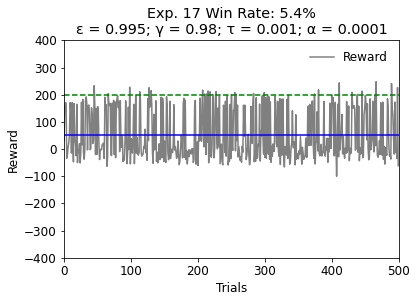

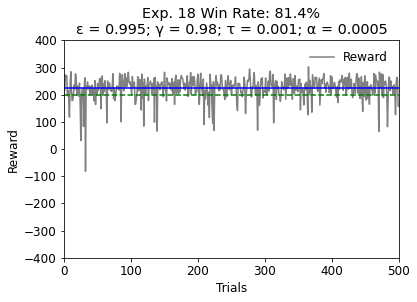

In [14]:
e=0
for m in range(len(models)):
    e=e+1
    plot_values(models[m], title_in = title[m], xlabel = "Trials", ylabel = "Reward", exp=e)